In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import cv2
import os

import numpy
from matplotlib import pyplot as plt

In [ ]:
!curl -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm
!ls -l dicom_00000001_000.dcm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1024k  100 1024k    0     0  2377k      0 --:--:-- --:--:-- --:--:-- 36.6M
-rw-r--r-- 1 root root 1049332 Jun 16 08:33 dicom_00000001_000.dcm


In [ ]:
try:
  # Use the Colab's preinstalled TensorFlow 2.x
  %tensorflow_version 2.x
except:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
pip install --no-deps tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

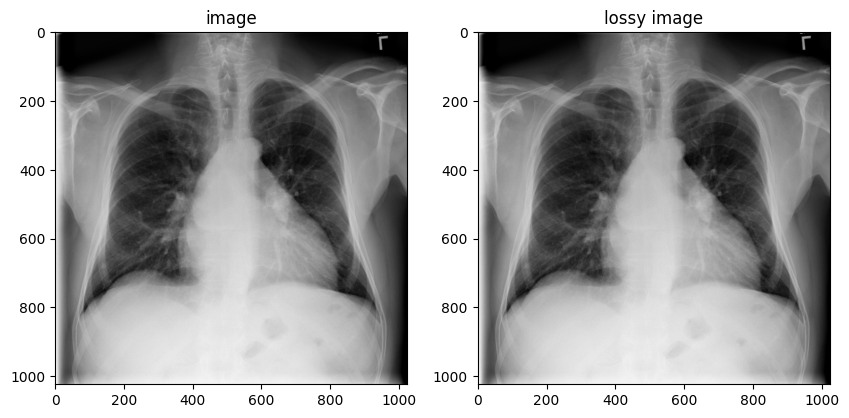

In [ ]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('dicom_00000001_000.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

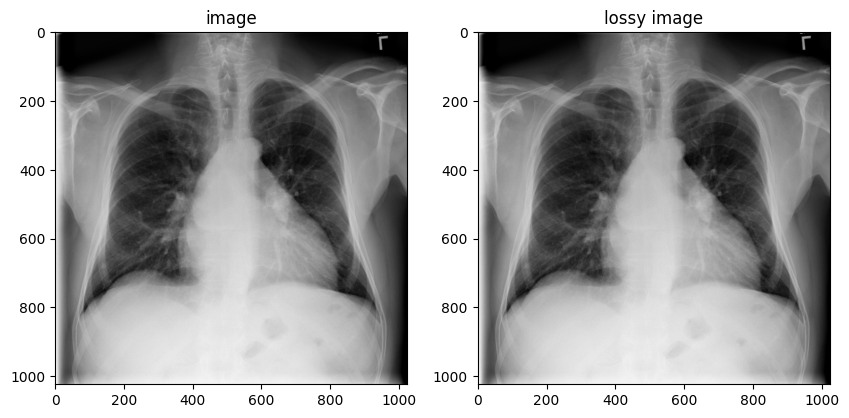

In [ ]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('dicom_00000001_000.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

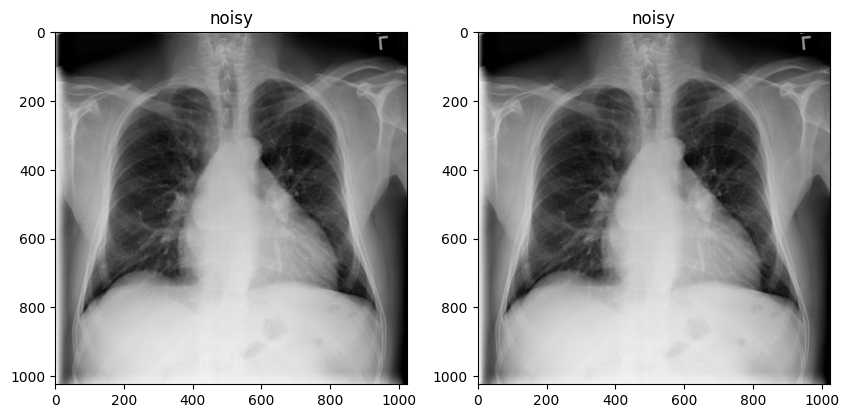

In [ ]:


def gauss_noise(image, gauss_var=1000):
    mean = 0
    sigma = gauss_var ** 0.9
    gauss = np.random.normal(mean, sigma, image.shape)

    res = image + gauss
    noisy = np.clip(res, 0, 255).astype(np.uint8)
    return noisy


def s_and_p_noise(image, s_p_ratio=0.64):
    # this implementation is not entirely correct because it assumes that
    # only 0 OR 255 values are S&P noise.
    out = np.copy(image)

    # Salt mode
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 255

    # Pepper mode
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 0
    return out


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('noisy')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('noisy');


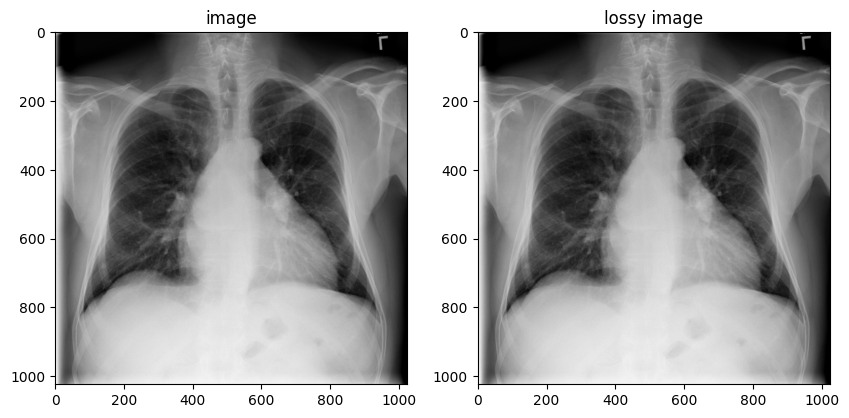

In [ ]:


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving 000129.jpeg to 000129.jpeg


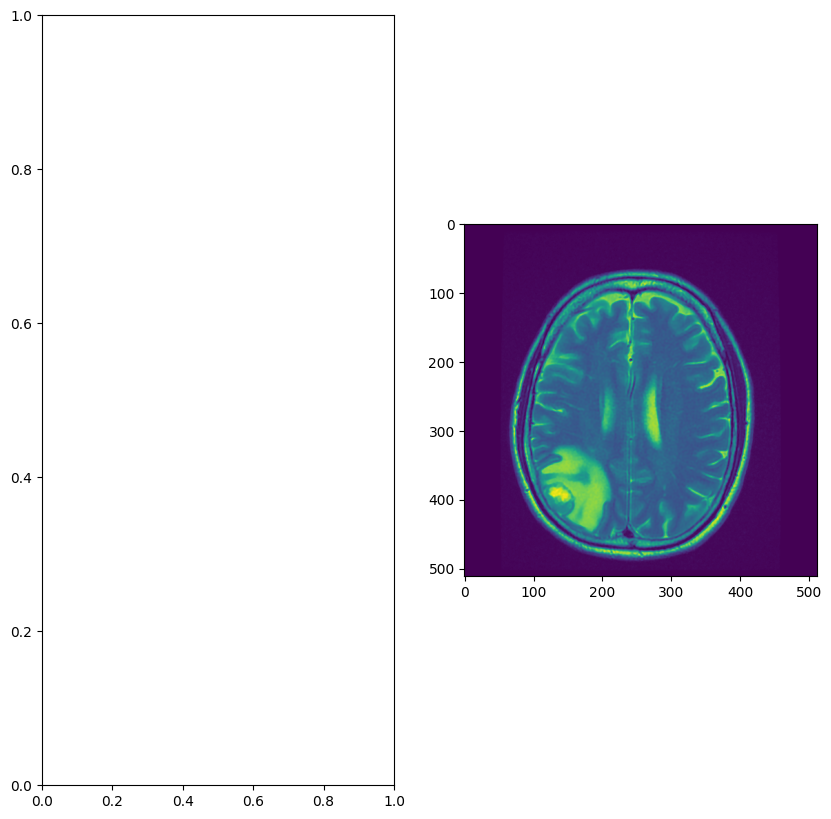

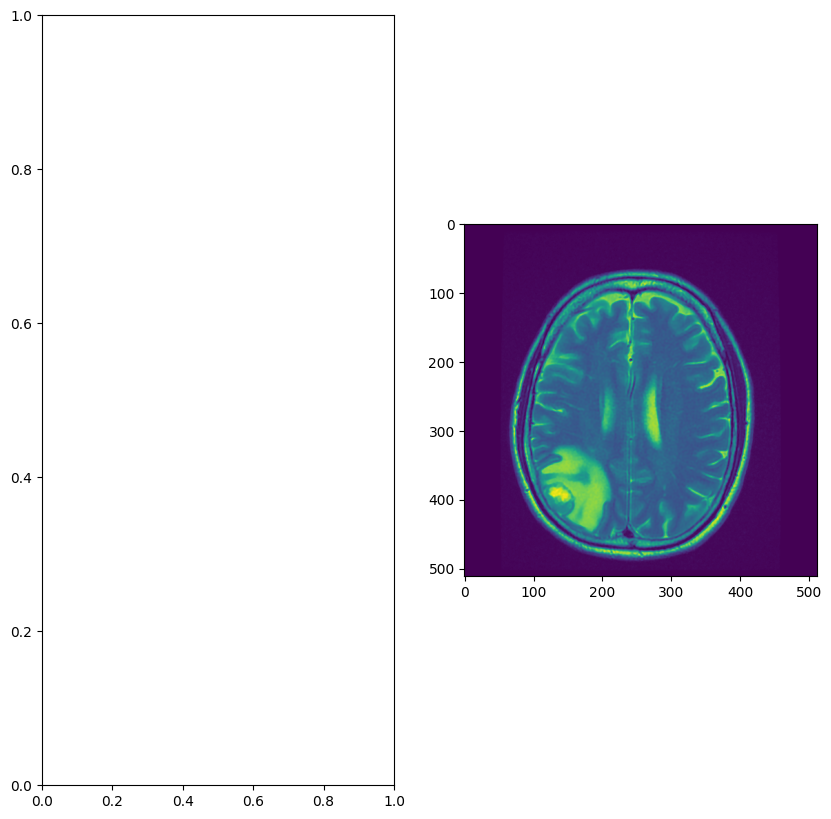

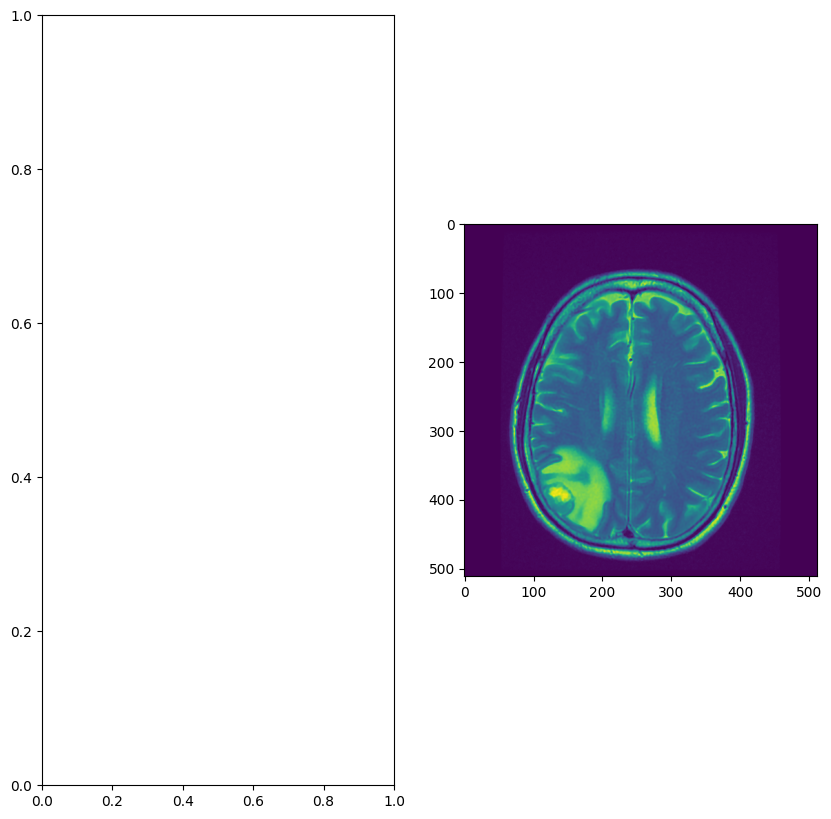

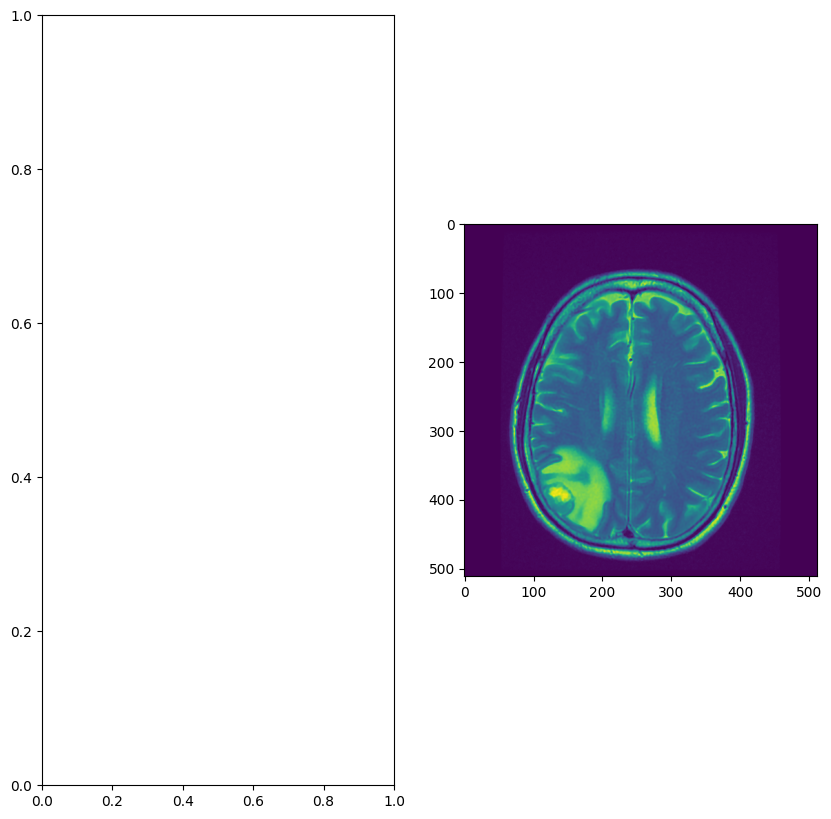

In [ ]:
# Iterate over the uploaded files
for filename in uploaded.keys():
    # Load the image
    image = mpimg.imread('mri-brain-tumor.tif')

    # Display the image
    plt.imshow(image)
    plt.axis('on')  # Turn off the axis
    plt.show()


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload multiple image files
uploaded = files.upload()

# Iterate over the uploaded files
for filename in uploaded.keys():
    # Load the image
    image = mpimg.imread(filename)


     # Convert BGR to RGB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    fig, axes = plt.subplots(1,2, figsize=(7,7))
    # Display the image
    plt.imshow(image)
      # Display the image without color space conversion
    plt.imshow(image, interpolation='none')
    plt.axis('off')  # Turn off the axis
    plt.show()

Saving 000000 - Copy (2).jpeg to 000000 - Copy (2) (2).jpeg
Saving 000000 - Copy.jpeg to 000000 - Copy (1).jpeg
Saving 000000.jpeg to 000000 (3).jpeg


TypeError: ignored

In [ ]:
class Tag(models.Model):
    pics = models.ManyToManyField(Picture)
    name = models.CharField(max_length=30)


In [ ]:
print(f"PatientsAge : {tag_value.numpy().decode('UTF-8')}")

In [ ]:
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()



In [ ]:

gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
############################ Denoising filters ###############
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/ChestXray/train'
valid_path = '/content/drive/MyDrive/ChestXray/test'

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

y = 100 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Noise Visualization")
plt.show()

In [ ]:
!curl -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm
!ls -l dicom_00000001_000.dcm

In [ ]:
try:
  # Use the Colab's preinstalled TensorFlow 2.x
  %tensorflow_version 2.x
except:
  pass

In [ ]:
!pip install tensorflow-io

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [ ]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('dicom_00000001_000.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

In [ ]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('dicom_00000001_000.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

In [ ]:
print(f"PatientsAge : {tag_value.numpy().decode('UTF-8')}")

In [ ]:
tag_id = tfio.image.dicom_tags.PatientsSex
tag_value = tfio.image.decode_dicom_data(image_bytes,tag_id)
print(f"PatientsSex : {tag_value.numpy().decode('UTF-8')}")

In [ ]:
from google.colab import files
from Ipython.display import image

In [ ]:
!pip install ipython
import IPython


In [ ]:
from google.colab import files
from Ipython.display import image

In [ ]:
uploaded = files.upload()
